Paper link: http://snap.stanford.edu/class/cs224w-2017/projects/cs224w-11-final.pdf

In [17]:
# Settings for autoreloading

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import numpy as np
import networkx as nx

In [19]:
import os

from utils.geodataframe import get_geodataframe


geojson_file_path = os.path.join('data', 'london_lsoa.json')

gdf = get_geodataframe(geojson_file_path)

gdf.head()

,geometry,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME
0,"MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51...",E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.74660,0,"Hillingdon, 00AS (0)"
1,"MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5...",E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.56517,1,"Newham, 00BB (1)"
2,"MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5...",E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.08241,2,"Newham, 00BB (2)"
3,"MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5...",E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.33175,3,"Newham, 00BB (3)"
4,"MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5...",E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.41902,4,"Newham, 00BB (4)"


In [20]:
from utils.geodataframe import set_geodataframe_centroids

set_geodataframe_centroids(gdf)

In [21]:
gdf.head()

,geometry,msoa_code,msoa_name,la_code,la_name,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID,DISPLAY_NAME,centroid
0,"MULTIPOLYGON (((-0.47794 51.55485, -0.47665 51...",E02000508,Hillingdon 015,00AS,Hillingdon,506163,183536,505978,183811,2.74660,0,"Hillingdon, 00AS (0)",POINT (-0.47059 51.54076)
1,"MULTIPOLYGON (((0.05255 51.56171, 0.05310 51.5...",E02000716,Newham 003,00BB,Newham,541978,186009,541870,185568,1.56517,1,"Newham, 00BB (1)",POINT (0.04657 51.55512)
2,"MULTIPOLYGON (((0.01001 51.52181, 0.01003 51.5...",E02000747,Newham 034,00BB,Newham,539578,181317,539891,181438,2.08241,2,"Newham, 00BB (2)",POINT (0.01007 51.51354)
3,"MULTIPOLYGON (((0.05392 51.51611, 0.05174 51.5...",E02000748,Newham 035,00BB,Newham,542500,181152,542439,181339,1.33175,3,"Newham, 00BB (3)",POINT (0.05208 51.51135)
4,"MULTIPOLYGON (((0.03241 51.51704, 0.03179 51.5...",E02000749,Newham 036,00BB,Newham,541047,181103,540847,181294,1.41902,4,"Newham, 00BB (4)",POINT (0.03118 51.51123)


In [22]:
from utils.spatial_network import get_spatial_network
spatial_network = get_spatial_network(gdf)

In [23]:
type(spatial_network)

networkx.classes.graph.Graph

In [24]:
spatial_network.nodes()

NodeView(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '

In [25]:
nx.is_directed(spatial_network)

False

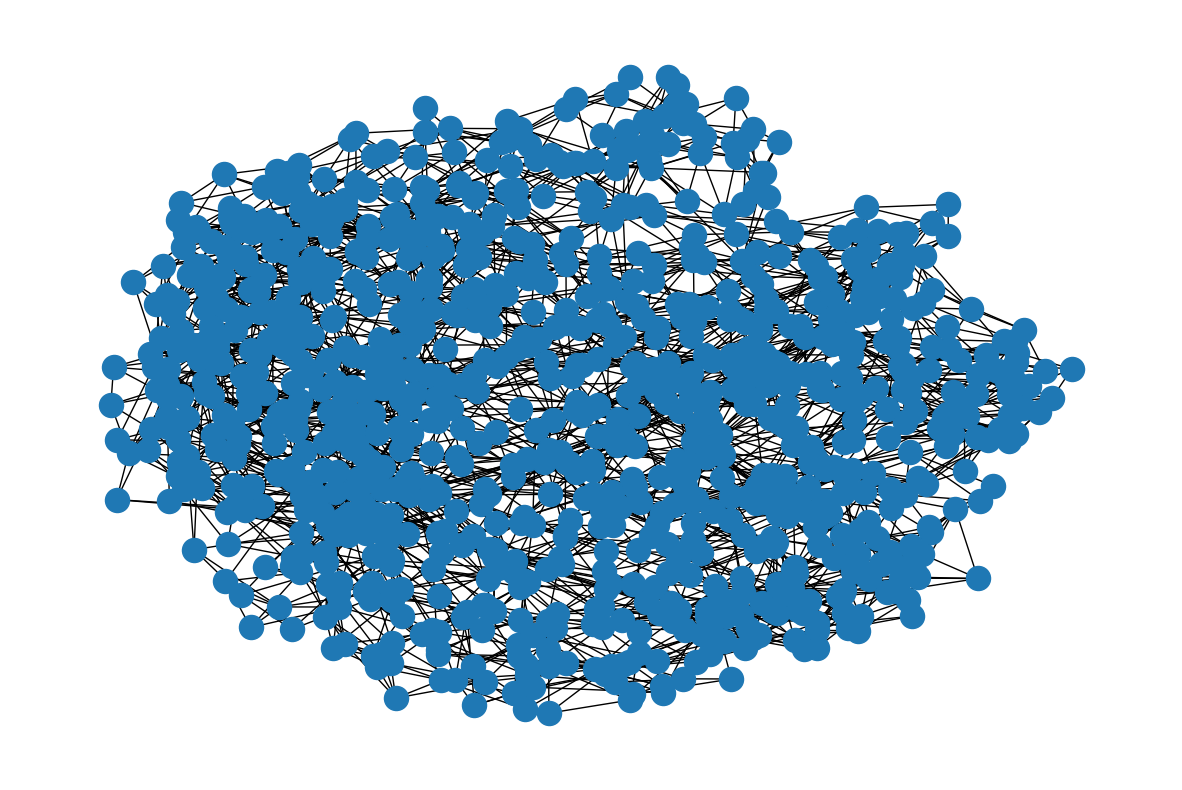

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

nx.draw(spatial_network)
plt.show()

In [27]:
import matplotlib.pyplot as plt

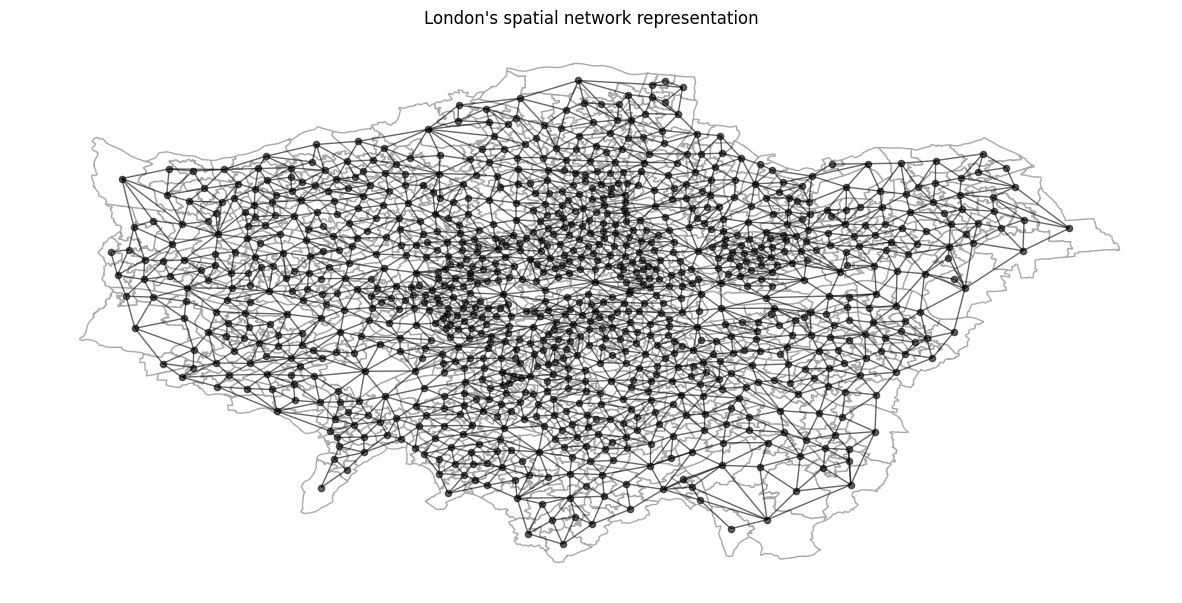

In [28]:
from utils.geodataframe import get_geodataframe_coordinates_dict

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

gdf.plot(ax=ax, edgecolor='darkgray', color='white')

coordinates = get_geodataframe_coordinates_dict(gdf)

nx.draw(
    spatial_network,
    coordinates,
    ax=ax,
    node_size=20,
    width=1,
    node_color="black",
    edge_color="black",
    alpha=.6,
)

plt.title("London's spatial network representation")

plt.show()

In [29]:
import networkx as nx
import pandas as pd

csv_path = os.path.join('data', 'london-lsoa-2020-1-All-HourlyAggregate.csv')

df = pd.read_csv(csv_path)
df.drop(['standard_deviation_travel_time', 'geometric_mean_travel_time', 'geometric_standard_deviation_travel_time'],
        inplace=True, axis=1)
df.head()

,sourceid,dstid,hod,mean_travel_time
0,669,439,6,703.23
1,638,749,6,554.82
2,615,649,6,715.64
3,618,619,6,397.91
4,632,479,6,4623.30


In [30]:
df['sourceid'] = df['sourceid'].apply(str)
df['dstid'] = df['dstid'].apply(str)

In [31]:
df_9 = df[df['hod'] == 5]

In [32]:
df_9.head()

,sourceid,dstid,hod,mean_travel_time
75,343,82,5,1245.18
530,213,161,5,486.29
531,208,211,5,394.88
532,207,221,5,1355.92
533,209,201,5,1336.23


In [33]:
G = nx.from_pandas_edgelist(df_9, source='sourceid', target='dstid', edge_attr='mean_travel_time')

<class 'str'>


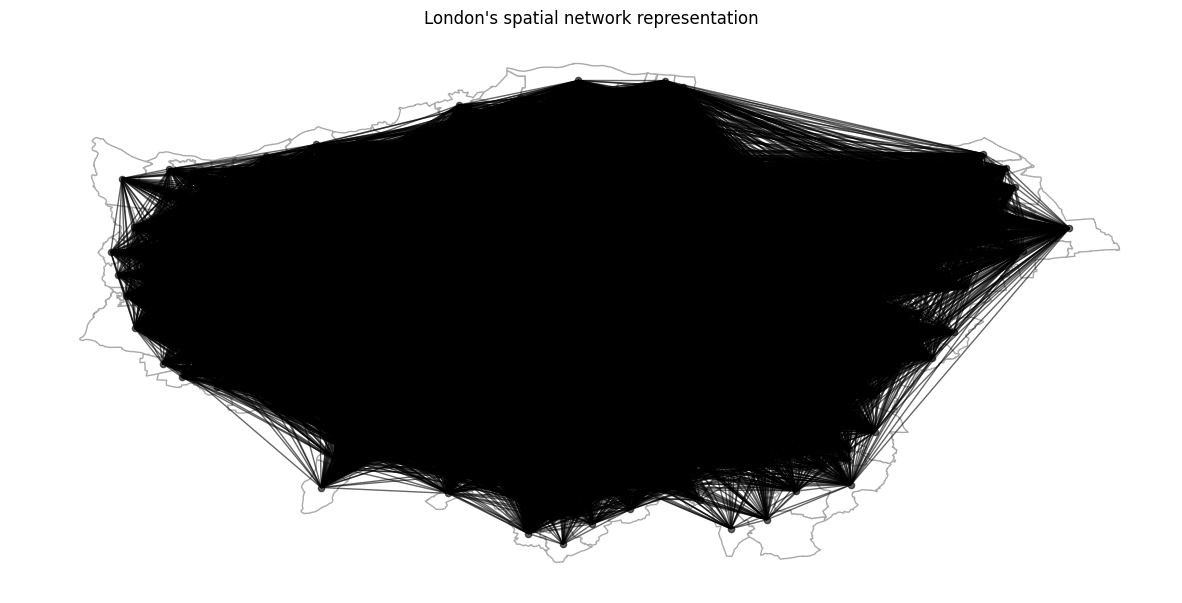

In [34]:
from utils.geodataframe import get_geodataframe_coordinates_dict

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

gdf.plot(ax=ax, edgecolor='darkgray', color='white')

coordinates = get_geodataframe_coordinates_dict(gdf)

print(type(list(coordinates.keys())[0]))

nx.draw(
    G,
    coordinates,
    ax=ax,
    node_size=20,
    width=1,
    node_color="black",
    edge_color="black",
    alpha=.6,
)

plt.title("London's spatial network representation")

plt.show()

In [36]:
set(nx.k_components(G))

{'10',
 '100',
 '102',
 '106',
 '131',
 '132',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '146',
 '147',
 '148',
 '149',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '16',
 '161',
 '165',
 '17',
 '177',
 '178',
 '179',
 '18',
 '180',
 '181',
 '184',
 '185',
 '186',
 '188',
 '19',
 '2',
 '20',
 '201',
 '202',
 '203',
 '204',
 '205',
 '206',
 '207',
 '208',
 '209',
 '21',
 '210',
 '211',
 '212',
 '213',
 '214',
 '215',
 '230',
 '231',
 '232',
 '233',
 '234',
 '235',
 '236',
 '237',
 '238',
 '239',
 '240',
 '241',
 '242',
 '243',
 '244',
 '246',
 '247',
 '250',
 '253',
 '265',
 '268',
 '269',
 '270',
 '271',
 '273',
 '280',
 '282',
 '285',
 '286',
 '287',
 '288',
 '289',
 '290',
 '291',
 '292',
 '317',
 '318',
 '319',
 '320',
 '321',
 '322',
 '323',
 '325',
 '326',
 '327',
 '328',
 '330',
 '331',
 '332',
 '333',
 '334',
 '335',
 '336',
 '337',
 '338',
 '339',
 '340',
 '341',
 '342',
 '345',
 '347',
 '348',
 '350',
 '351',
 '352',
 '354',
 '